# Aula 1 - Clasificación: ¿Cómo funciona?

## 1.1 - Importando los datos

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('Customer.csv')

In [3]:
datos.shape

(7043, 18)

In [4]:
datos.head()

,Mayor60Años,Conyuge,Dependientes,MesesDeContrato,TelefonoFijo,VariasLineasTelefonicas,ServicioDeInternet,SeguridadOnline,BackupOnline,SeguroEnDispositivo,SoporteTecnico,TVCable,Streaming,TipoDeContrato,PagoOnline,FormaDePago,CuentaMensual,Churn
0,0,Si,No,1,No,SinServicioTelefonico,DSL,No,Si,No,No,No,No,Mensual,Si,ChequeDigital,29.85,No
1,0,No,No,34,Si,No,DSL,Si,No,Si,No,No,No,UnAño,No,ChequePapel,56.95,No
2,0,No,No,2,Si,No,DSL,Si,Si,No,No,No,No,Mensual,Si,ChequePapel,53.85,Si
3,0,No,No,45,No,SinServicioTelefonico,DSL,Si,No,Si,Si,No,No,UnAño,No,DebitoEnCuenta,42.30,No
4,0,No,No,2,Si,No,FibraOptica,No,No,No,No,No,No,Mensual,Si,ChequeDigital,70.70,Si


## 1.2 - Analizando las Variables

In [5]:
#Modificación de forma manual
diccionario = {'Si': 1,
                'No': 0}

datosmodificados = datos[['Conyuge', 'Dependientes', 'TelefonoFijo', 'PagoOnline', 'Churn']].replace(diccionario)
datosmodificados.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [6]:
#Transformación con get_dummies
dummie_datos = pd.get_dummies(datos.drop(['Conyuge', 'Dependientes', 'TelefonoFijo', 'PagoOnline', 'Churn'],
                axis=1))

#Unión de los datos transformados con los que ya teníamos
datos_final = pd.concat([datosmodificados, dummie_datos], axis=1)

In [7]:
datos_final.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn,Mayor60Años,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,...,Streaming_No,Streaming_Si,Streaming_SinServicioDeInternet,TipoDeContrato_DosAños,TipoDeContrato_Mensual,TipoDeContrato_UnAño,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoEnCuenta,FormaDePago_TarjetaDeCredito
0,1,0,0,1,0,0,1,29.85,0,0,...,1,0,0,0,1,0,1,0,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,1,0,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,45,42.30,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,1,0,0,0


## 1.3 - Definición Formal

Informaciones para la clasificación:

$X$ = inputs (datos de entrada)

$y$ = outputs (datos de salida)

In [8]:
#TIP
pd.set_option('display.max_columns', 39)

In [9]:
datos_final.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn,Mayor60Años,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,VariasLineasTelefonicas_SinServicioTelefonico,ServicioDeInternet_DSL,ServicioDeInternet_FibraOptica,ServicioDeInternet_No,SeguridadOnline_No,SeguridadOnline_Si,SeguridadOnline_SinServicioDeInternet,BackupOnline_No,BackupOnline_Si,BackupOnline_SinServicioDeInternet,SeguroEnDispositivo_No,SeguroEnDispositivo_Si,SeguroEnDispositivo_SinServicioDeInternet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_SinServicioDeInternet,TVCable_No,TVCable_Si,TVCable_SinServicioDeInternet,Streaming_No,Streaming_Si,Streaming_SinServicioDeInternet,TipoDeContrato_DosAños,TipoDeContrato_Mensual,TipoDeContrato_UnAño,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoEnCuenta,FormaDePago_TarjetaDeCredito
0,1,0,0,1,0,0,1,29.85,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,45,42.30,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0



$y_i$ = $f(x_i)$

In [10]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [11]:
#ymaria = ?

Nuevo par de informaciones = ($Xmaria$, $ymaria$)

## 1.4 - Balanceamiento de los datos

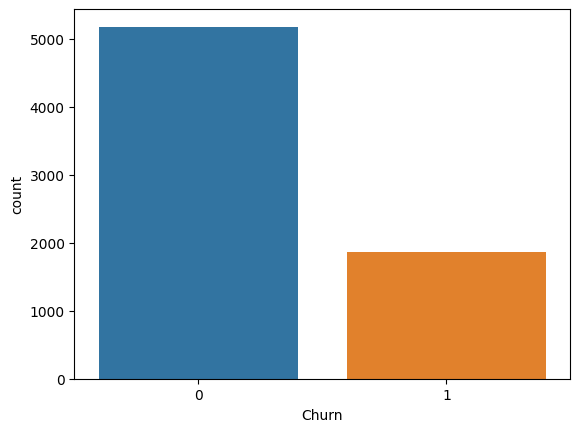

In [12]:
#variable target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=datos_final)

In [13]:
datos_final.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [14]:
#biblioteca para balancear los datos utilizando over_sampling
from imblearn.over_sampling import SMOTE

In [15]:
#dividiendo los datos en características y target
X = datos_final.drop('Churn', axis = 1)
y = datos_final['Churn']

In [16]:
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

In [17]:
#unión de los datos balanceados
datos_final = pd.concat([X, y], axis=1)

In [18]:
#verificación 1 - unión de los datos
datos_final.head(2)

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Mayor60Años,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,VariasLineasTelefonicas_SinServicioTelefonico,ServicioDeInternet_DSL,ServicioDeInternet_FibraOptica,ServicioDeInternet_No,SeguridadOnline_No,SeguridadOnline_Si,SeguridadOnline_SinServicioDeInternet,BackupOnline_No,BackupOnline_Si,BackupOnline_SinServicioDeInternet,SeguroEnDispositivo_No,SeguroEnDispositivo_Si,SeguroEnDispositivo_SinServicioDeInternet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_SinServicioDeInternet,TVCable_No,TVCable_Si,TVCable_SinServicioDeInternet,Streaming_No,Streaming_Si,Streaming_SinServicioDeInternet,TipoDeContrato_DosAños,TipoDeContrato_Mensual,TipoDeContrato_UnAño,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoEnCuenta,FormaDePago_TarjetaDeCredito,Churn
0,1,0,0,1,0,1,29.85,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0


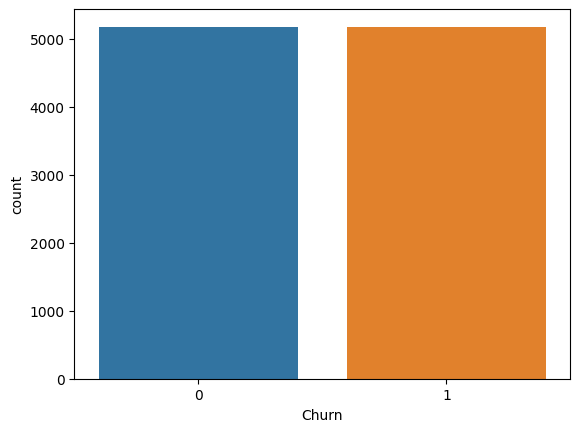

In [19]:
#verificación 2 - balanceamiento
ax = sns.countplot(x='Churn', data=datos_final)

In [20]:
datos_final.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# Aula 2 - Método baseado en la proximidad

## 2.1 - Modelo K-nearest neighbors (KNN)

(PPT)

## 2.2 - KNN en la práctica

In [21]:
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [22]:
#ymaria = ?

In [23]:
#División en inputs y outputs
X = datos_final.drop('Churn', axis = 1)
y = datos_final['Churn']

In [24]:
#biblioteca para padronizar los datos
from sklearn.preprocessing import StandardScaler

In [25]:
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52771004, -3.06083934, ..., -0.47912706,
        -0.4360152 , -0.42576817],
       [-0.79024667, -0.52771004,  0.32670777, ...,  2.08712905,
        -0.4360152 , -0.42576817],
       [-0.79024667, -0.52771004,  0.32670777, ...,  2.08712905,
        -0.4360152 , -0.42576817],
       ...,
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.47912706,
        -0.4360152 , -0.42576817],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.47912706,
        -0.4360152 ,  2.34869598],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.47912706,
        -0.4360152 ,  2.34869598]])

In [26]:
X_normalizado[0]

array([ 1.26542767, -0.52771004, -3.06083934,  0.81482091, -0.41318358,
       -1.10771815, -1.3217706 , -0.88447396, -0.83366906,  3.18604176,
        1.51268338, -1.04386816, -0.44617598,  0.86827317, -0.51721942,
       -0.44617598, -0.95834643,  1.57389661, -0.44617598,  1.04285807,
       -0.64211419, -0.44617598,  0.87979784, -0.52426638, -0.44617598,
        1.18690873, -0.77707385, -0.44617598,  1.20311799, -0.78976268,
       -0.44617598, -0.44648735,  0.73788726, -0.41989297,  1.30373042,
       -0.47912706, -0.4360152 , -0.42576817])

In [27]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52771004,  0.32670777,  0.81482091, -0.41318358,
        -1.14938255, -0.97236043,  1.13061554, -0.83366906, -0.31386908,
        -0.66107688,  0.95797538, -0.44617598,  0.86827317, -0.51721942,
        -0.44617598, -0.95834643, -0.63536575,  2.24126814,  1.04285807,
         1.5573554 , -0.44617598, -1.13662476,  1.90742727, -0.44617598,
         1.18690873, -0.77707385, -0.44617598, -0.83117367, -0.78976268,
         2.24126814, -0.44648735, -1.35522058,  2.38155929, -0.76702973,
        -0.47912706, -0.4360152 ,  2.34869598]])

Distancia Euclidiana:

$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$


In [28]:
import numpy as np

In [29]:
a = Xmaria_normalizado

In [30]:
b = X_normalizado[0]

In [31]:
#1 - comenzamos restando
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.0416644 ,  0.34941017,  2.0150895 ,  0.        , -3.49991084,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -2.20926236,  2.68744412,  0.        ,
         2.19946959,  0.        , -2.01642259,  2.43169366,  0.        ,
         0.        ,  0.        ,  0.        , -2.03429166,  0.        ,
         2.68744412,  0.        , -2.09310784,  2.80145225, -2.07076016,
         0.        ,  0.        ,  2.77446415]])

In [32]:
#2 - después realizamos la exponenciación
np.square(a-b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73592202e-03, 1.22087466e-01, 4.06058568e+00,
        0.00000000e+00, 1.22493759e+01, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.88084017e+00, 7.22235589e+00, 0.00000000e+00,
        4.83766647e+00, 0.00000000e+00, 4.06596007e+00, 5.91313404e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13834258e+00, 0.00000000e+00, 7.22235589e+00, 0.00000000e+00,
        4.38110042e+00, 7.84813473e+00, 4.28804763e+00, 0.00000000e+00,
        0.00000000e+00, 7.69765133e+00]])

In [33]:
#3 - realizamos la suma
np.sum(np.square(a-b))

103.36325779671671

In [34]:
#4 - finalmente obtenemos la raiz cuadrada y tenemos nuestra distancia
np.sqrt(103.36325779671671)

10.166772240820423

## 2.3 - Implementando el modelo

In [35]:
#biblioteca para división de los datos
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

### Entrenamiento y prueba

In [37]:
#biblioteca para crear el modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [38]:
#iniciar el modelo (creamos el modelo) - por default son 5 vecinos
knn = KNeighborsClassifier(metric='euclidean')

In [39]:
#entrenando el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [40]:
#probando el modelo con los datos de prueba
prediccion_knn = knn.predict(X_test)

In [41]:
prediccion_knn

array([1, 0, 0, ..., 0, 1, 1])

# Aula 3 - Método probabilístico

## 3.1 - Teorema de Naive Bayes

(PPT)

## 3.2 - Modelo Bernoulli Naive Bayes

(PPT)

## 3.3 - Entrenamiento y prueba

In [42]:
#biblioteca para crear el modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

In [43]:
#escojo utilizar mediana, porque es el valor central de nuestros datos ordenados
mediana = np.median(X_train)
mediana

-0.4461759755508453

In [44]:
#Binarizando los recursos usando la mediana
X_train_binarizado = np.where(X_train > mediana, 1, 0)

In [45]:
X_train_binarizado

array([[0, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 1, 1]])

In [46]:
y_train

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [47]:
#creamos el modelo
bnb = BernoulliNB()

In [48]:
#entrenando el modelo
bnb.fit(X_train_binarizado, y_train)

BernoulliNB()

In [49]:
#Binarizando la base de prueba
X_test_binarizado = np.where(X_test > np.median(X_test), 1, 0)

In [50]:
#probando el modelo
prediccion_BNb = bnb.predict(X_test_binarizado)

In [51]:
prediccion_BNb

array([1, 0, 0, ..., 1, 1, 1])

# Aula 4 - Método Simbólico

## 4.1 - ¿Qué es un árbol de decisión?

(PPT)

## 4.2 - ¿Cómo funciona un árbol de decisión?

(PPT)

## 4.3 - Implementando el modelo

In [52]:
#biblioteca para crear el modelo de machine learning
from sklearn.tree import DecisionTreeClassifier

In [53]:
#iniciando el modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [54]:
#entrenando el modelo
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [55]:
#verificando la importancia de cada atributo
dtc.feature_importances_

array([0.02243428, 0.01223771, 0.00575433, 0.01818431, 0.01693893,
       0.16491182, 0.22384714, 0.01029507, 0.00861237, 0.00429131,
       0.0019815 , 0.03128648, 0.        , 0.01153661, 0.01516212,
       0.        , 0.00378651, 0.01208236, 0.        , 0.01143488,
       0.00586885, 0.        , 0.01332184, 0.02079021, 0.00027769,
       0.00298793, 0.00351301, 0.00433452, 0.00745511, 0.01266344,
       0.        , 0.03622159, 0.16358635, 0.07445054, 0.02315574,
       0.02006142, 0.01865312, 0.01788091])

In [56]:
prediccion_ArbolDecision = dtc.predict(X_test)

In [57]:
prediccion_ArbolDecision

array([0, 0, 0, ..., 1, 1, 1])

# 5 - Validación de los modelos

## 5.1 - Matriz de confusión



![image.png](https://raw.githubusercontent.com/ElProfeAlejo/machine_learning_clasificacion/main/imagen_5_1.png)

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
print(confusion_matrix(y_test, prediccion_knn))

[[1242  327]
 [ 247 1289]]


In [60]:
print(confusion_matrix(y_test, prediccion_BNb))

[[1048  521]
 [ 241 1295]]


In [61]:
print(confusion_matrix(y_test, prediccion_ArbolDecision))

[[1242  327]
 [ 271 1265]]


## 5.2 - Accuracy
A partir del cálculo de la matriz de confusión, podemos inferir otras métricas, como el accuracy.




$ACC$ = ${TP + TN \over TP + FP + TN + FN}$

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
#modelo KNN
print(accuracy_score(y_test, prediccion_knn))

0.8151368760064412


In [64]:
#modelo Bernoulli de Naive Bayes
print(accuracy_score(y_test, prediccion_BNb))

0.7545893719806763


In [65]:
#modelo Arbol de Decisión
print(accuracy_score(y_test, prediccion_ArbolDecision))

0.8074074074074075


## 5.3 - Precisión

Otra métrica importante es la precisión, que calcula cuántos se clasificaron correctamente como positivos ($TP$).

$PS$ = ${TP \over TP + FP}$

In [66]:
from sklearn.metrics import precision_score

In [67]:
#modelo KNN
print(precision_score(y_test, prediccion_knn))

0.7976485148514851


In [68]:
#modelo Bernoulli de Naive Bayes
print(precision_score(y_test, prediccion_BNb))

0.7131057268722467


In [69]:
#modelo Arbol de Decisión
print(precision_score(y_test, prediccion_ArbolDecision))

0.7945979899497487


## 5.4 - Recall

Otra métrica es el Recall o sensibilidad, calcula qué tan bueno es el modelo para clasificar correctamente un resultado positivo ($TP$).

$RC$ = ${TP \over TP + FN}$

In [70]:
from sklearn.metrics import recall_score

In [71]:
#modelo KNN
print(recall_score(y_test, prediccion_knn))

0.8391927083333334


In [72]:
#modelo Bernoulli de Naive Bayes
print(recall_score(y_test, prediccion_BNb))

0.8430989583333334


In [73]:
#modelo Arbol de Decisión
print(recall_score(y_test, prediccion_ArbolDecision))

0.8235677083333334


## 5.5 - Escogiendo el mejor modelo


In [74]:
#Ejemplo - análisis de las precisiones previamente calculadas
print('Modelo KNN: ', precision_score(y_test, prediccion_knn))
print('Modelo Bernoulli de Naive Bayes: ', precision_score(y_test, prediccion_BNb))
print('Modelo Arbol de Decisión: ', precision_score(y_test, prediccion_ArbolDecision))

Modelo KNN:  0.7976485148514851
Modelo Bernoulli de Naive Bayes:  0.7131057268722467
Modelo Arbol de Decisión:  0.7945979899497487


In [75]:
#Probando el mejor modelo para Maria
prediccion_maria = knn.predict(Xmaria_normalizado)
diccionario = {'Si': 1, 'No': 0}

clave_encontrada = next((clave for clave, valor in diccionario.items() if valor == prediccion_maria[0]), None)
print(f"La probabilidad de que Maria se convierta en Churn es: {clave_encontrada}")

La probabilidad de que Maria se convierta en Churn es: No
